# Exercise 2: Plotting graphs with Matplotlib

## Aims: Introduce plotting graphs using matplotlib

### Issues covered:

- Import, create and save plots made using matplotlib
- Plotting with multiple axes and multiple graphs on the page
- Plot gridded data using Cartopy

## 1. Getting started with Matplotlib

In this section, this will be an introduction to using matplotlib and creating simple plots.

Note: with Jupyter notebooks, each codeblock resets any previous plots and matplotlib calls and is independent of each other.
To display a plot, just run the code block unless stated otherwise.

Import `matplotlib.pyplot` as `plt`

In [2]:
import matplotlib.pyplot as plt

Create a basic line graph using `plot` defined by `range(10)` using `plt.plot`

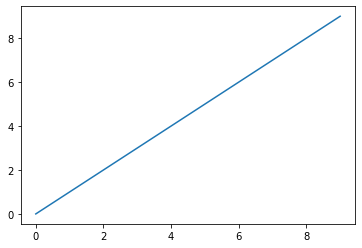

In [3]:
plt.plot(range(10))

Let's create a pretty plot of chemistry data as follows:

```yaml
Time (decade):  [0, 1, 2, 3, 4, 5, 6]
CO2 concentration (ppm): [250, 265, 272, 260, 300, 320, 389]
```

Create a line graph of `CO2` versus `Time`

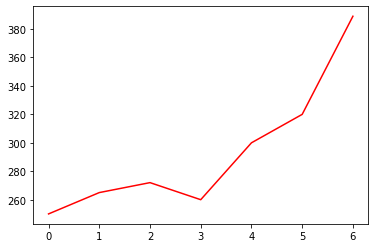

In [4]:
# Hint: You will want to enter the data into a list for each.

CO2 = [250, 265, 272, 260, 300, 320, 389]
Time = [0, 1, 2, 3, 4, 5, 6]
plt.plot(Time, CO2, 'r')

Re-draw the graph with a blue dashed line (i.e. `color='b'` and `linestyle='dashed'`)
- Add a title and label the axes to the plot.

Text(0.5, 0, 'Time')

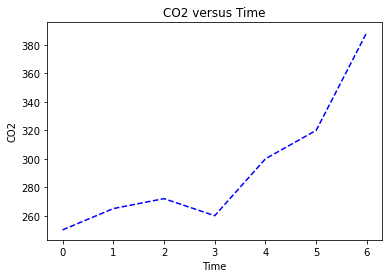

In [5]:
plt.plot(Time, CO2, 'b--')
plt.title('CO2 versus Time')
plt.ylabel('CO2')
plt.xlabel('Time')

Using `CO2` and `Time` data as before, add some additional data:
```yaml
Temp (°C): [14.1, 15.5, 16.3, 18.1, 17.3, 19.1, 20.2]
```
Plot both `CO2` versus `Time` and `Temp` versus `Time` on the same plot. Let the first be a blue dashed line, `b--`, and second be a red star-dashed line, `r*-`.

*Do not worry about the plot's scale, this can be fixed using multiple axes in the next section.*

- Save the plot to your local space as a PDF file with `plt.save`

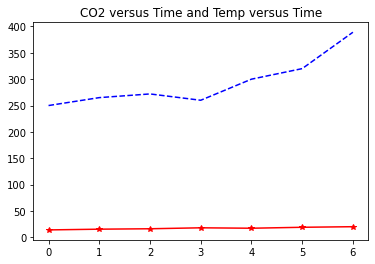

In [6]:
Temp = [14.1, 15.5, 16.3, 18.1, 17.3, 19.1, 20.2]

plt.plot(Time, CO2, 'b--')
plt.plot(Time, Temp, 'r*-')
plt.title('CO2 versus Time and Temp versus Time')
plt.savefig("matplotlib.1.pdf")


## 2. Multiple axes and multiple graphs

To use multiple axes and graphs, rather than calling `plt.plot`, you can use `fig, ax1 = plt.subplots()`.
Now you can create plots using `ax1` rather than `plt`.

Use the same data as before; `CO2`, `Temp`, `Time`:

Create a line graph of `CO2` versus `Time` with `ax1`. Use a blue dashed line.

- Set the y-axis label to "CO2 concentration (ppm)" using the `ax1.set_ylabel()` method.

Get a second axis object using: `ax2 = ax1.twinx()`

Create a line graph of `Temp` versus `Time` with `ax2`. Use a red star-dashed line.

- Set the y-axis label to "Temp (°C)" using the `ax2.set_ylabel()` method.

Text(0, 0.5, 'Temp(°C)')

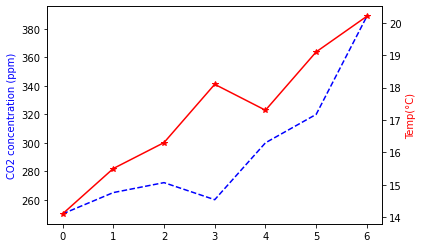

In [7]:
fig, ax1 = plt.subplots()

ax1.plot(Time, CO2, 'b--')
ax1.set_ylabel("CO2 concentration (ppm)", color='b')

ax2 = ax1.twinx()
ax2.plot(Time, Temp, 'r*-')
ax2.set_ylabel("Temp(°C)", color='r')





Let's draw three graphs side by side on a single page.

Use the `plt.subplot` function to select the first of three plots
(i.e. `subplot(1, 3, 1)` where the first and second value is the number of plots x and y and third number is selecting which plot)

- On subplot 1, plot a line of values: `range(0, 10, 1)`
- On subplot 2, plot a line of values: `range(10, 0, -1)`
- On subplot 3, plot a line of values: `[4] * 10`

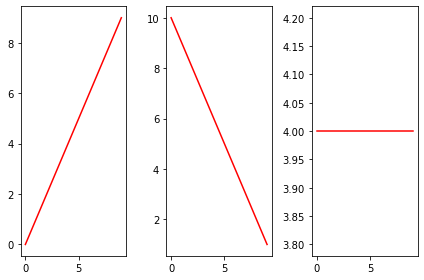

In [8]:
plt.subplot(1, 3, 1)
plt.plot(range(0, 10, 1), 'r')

plt.subplot(1, 3, 2)
plt.plot(range(10, 0, -1), 'r')

plt.subplot(1, 3, 3)
plt.plot([4] * 10, 'r')
plt.tight_layout()
# plt.subplots_adjust(left=None, bottom=None, right=2, top=None, wspace=None)



## 3. Plotting gridded data on a map

In this section, we will use `cartopy` - a python module that supports maps and usage with `matplotlib`.

First, let's grab some data from a NetCDF file and quickly plot it.

The file `../example_data/tas.nc` contains surface air temperature differences.

We can extract the data and prepare it by importing the `example_code/map_data.py` module.

Import the following:

- NOTE: first, add `".."` to the `sys.path` list so that it can find the `example_code` package.
- From the `example_code/map_data.py` module import `tas` (temperature), `lons` (longitude), and `lats` (latitude).
- Import `cartopy.crs` as `ccrs`


Create a new figure using `fig = plt.figure()` and set up a projection instance with a regular lat/lon coordinate reference system:
`proj = ccrs.PlateCarree(central_longitude=0)`

Make a plot using this projection: `mymap = fig.add_subplot(1,1,1, projection=proj)`

Create a `Jet` colour map to plot the data:
`im1 = mymap.pcolormesh(lons, lats, tas, shading='flat', cmap=plt.cm.jet)`

Add coastlines: `mymap.coastlines(resolution='110m')`

- Save the plot as "tas1.png"
- Display the plot with `plt.show()`

/opt/jaspy/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


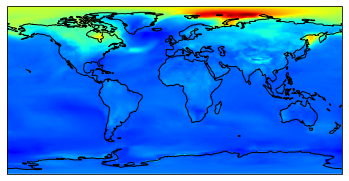

In [22]:
import sys
sys.path
sys.path.append('..')
from example_code.map_data import tas, lons, lats
import cartopy.crs as ccrs


fig = plt.figure()
proj = ccrs.PlateCarree(central_longitude=0)
mymap = fig.add_subplot(1,1,1, projection=proj)
im1 = mymap.pcolormesh(lons, lats, tas, shading='auto', cmap=plt.cm.jet)
mymap.coastlines(resolution='110m')
plt.show()



Import some more modules: `import cartopy.util as cutil`

Let's jazz up the plot by creating a wrapping longitude and adding some features.

Wrap the data and longitudes to remove the missing data line down the middle of plot using `cutil`:
`tas, lons = cutil.add_cyclic_point(tas, lons)`

Copy the instructions above from creating the `fig` to up until you save the plot.

Add a title: "Change in Surface Air Temperature from MOHC HadGEM2-ES" using `mymap` to set the title.

Add some vertical and horizontal grid lines: `gridlines = mymap.gridlines(crs=ccrs.PlateCarree())`

Add a colour bar after generating the colour map `im1`, with: `cb = fig.colorbar(im1, orientation="horizontal")`

- Save the plot as "tas2.png"
- Display the plot.

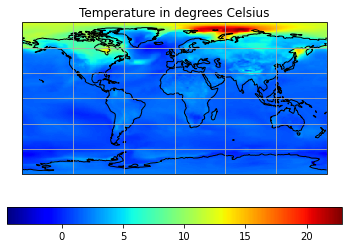

In [26]:
import cartopy.util as cutil
tas, lons = cutil.add_cyclic_point(tas, lons)

fig = plt.figure()
proj = ccrs.PlateCarree(central_longitude=0)
mymap = fig.add_subplot(1,1,1, projection=proj)
im1 = mymap.pcolormesh(lons, lats, tas, shading='auto', cmap=plt.cm.jet)
cb = fig.colorbar(im1, orientation="horizontal")
mymap.coastlines(resolution='110m')
# mymap.title("Change in Surface Air Temperature from MOHC HadGEM2-ES")
plt.title('Temperature in degrees Celsius')
mymap.gridlines(crs=ccrs.PlateCarree())

plt.show()

